<a href="https://colab.research.google.com/github/ChavChavC/BT4222/blob/main/error_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reading Data

In [4]:
import pandas as pd

# Reading the data
# This dataset is a dataset of all the data points that were predicted wrongly
df = pd.read_csv("error_analysis_bt4222.csv")

## Data Manipulation for analysis

In [5]:
# Filtering the examples based on their predictions
df_negative = df[df["pred_labels"] == 0]
df_neutral = df[df["pred_labels"] == 1]
df_positive = df[df["pred_labels"] == 2]

# reseting index for data manipulation later on
df_negative = df_negative.reset_index(drop=True)
df_positive = df_positive.reset_index(drop=True)
df_neutral = df_neutral.reset_index(drop=True)


In [6]:
# Checking how many wrongly predited values are

print(f'Predicted Negative: {len(df_negative)}')
print(f'Predicted Neutral: {len(df_neutral)}')
print(f'Predicted Positive: {len(df_positive)}')

Predicted Negative: 34
Predicted Neutral: 370
Predicted Positive: 126


# Exploring data that was predicted wrongly

### Exploring data that were predicted to be positive wrongly

In [7]:
for i in range(5, 10):
    print(df_positive["title_x"][i])
    print(df_positive["title_y"][i])
    print(f'Actual Label: {df_positive["labels"][i]}')
    print(f'Predicted: {df_positive["pred_labels"][i]}')

NioBay provides update on high volume of trading
niobay provides update on high volume of trading
Actual Label: 1
Predicted: 2
Oil trades at 3-month low https://t.co/6F8tuUZLyb
oil trade at low
Actual Label: 0
Predicted: 2
Imagine Holding Dacian Gold (ASX:DCN) Shares While The Price Zoomed 377% Higher
imagine holding dacian gold asxdcn share while the price zoomed higher
Actual Label: 1
Predicted: 2
Coronavirus cases inch up in U.S. but still very light
coronavirus case inch up in u but still very light
Actual Label: 1
Predicted: 2
Gold dips as trade deal optimism benefits riskier assets https://t.co/RWN6oROmRi https://t.co/YDYtPtJpJ9
gold dip a trade deal optimism benefit riskier asset
Actual Label: 0
Predicted: 2


### Exploring data points that were predicted to be negative wrongly

#

In [8]:
for i in range(5, 10):
    print(df_negative["title_x"][i])
    print(df_negative["title_y"][i])
    print(f'Actual Label: {df_negative["labels"][i]}')
    print(f'Predicted: {df_negative["pred_labels"][i]}')

12-month rate of core PPI slips to 3-year low of 1.3%
rate of core ppi slip to low of
Actual Label: 1
Predicted: 0
SocGen Pledges Higher Returns After Signaling It May Miss Target
socgen pledge higher return after signaling it may miss target
Actual Label: 1
Predicted: 0
Loss of Trust Led to Thiam's Exit, Credit Suisse Says
loss of trust led to thiams exit credit suisse say
Actual Label: 1
Predicted: 0
Crude Oil Price Update – Direction Controlled by $51.84 Pivot
crude oil price update direction controlled by pivot
Actual Label: 1
Predicted: 0
Mazda issues recall over Takata airbag inflators again
mazda issue recall over takata airbag inflator again
Actual Label: 1
Predicted: 0


### Finding out the percentage of true neutral values within these wrongly predicted postive and negative examples

In [9]:
print(len(df_positive[df_positive["labels"] == 1]) / len(df_positive))
print(len(df_negative[df_negative["labels"] == 1]) / len(df_negative))

0.6984126984126984
0.5882352941176471


### Conclusion
More than 50% of wrongly predicted values are actually truly neutral, this could be because these data points are very close or slightly over the neutral area for neutral values.

# Analysing worst prediction outcome
This section, we seek to explore examples that were completely wrong. These examples consists mainly of two cases:
1) Positive Examples that were predicted to be negative
2) Negative Examples that were predicted to be positive

In [10]:
pred_neg_true_pos_df = df[(df["labels"] == 2) & (df["pred_labels"] == 0)]
pred_neg_true_pos_df = pred_neg_true_pos_df.reset_index(drop=True)

In [11]:
for i in range(13):
    print(f'Original Text: {pred_neg_true_pos_df["title_x"][i]}')
    print(f'Lemmatized Text: {pred_neg_true_pos_df["title_y"][i]}')
    print()

Original Text: Financial Stability Report: Contagion Risk From NBFCs Falls, Says RBI
Lemmatized Text: financial stability report contagion risk from nbfcs fall say rbi

Original Text: Stock market live Wednesday: S&P 500 erases coronavirus sell-off, Tesla's 2nd worst drop ever - CNBC
Lemmatized Text: stock market live wednesday sp era coronavirus tesla nd worst drop ever cnbc

Original Text: U.S. Claims for Jobless Benefits Fall to Lowest Since April
Lemmatized Text: u claim for jobless benefit fall to lowest since april

Original Text: $ECONX: October Wholesale Inventories M/M -0.7% vs +0.2% https://t.co/M9gpUZQoF7 consensus https://t.co/FnLMSxNhlq
Lemmatized Text: october wholesale inventory mm v

Original Text: Treasury yields pare decline after January jobs report
Lemmatized Text: treasury yield pare decline after january job report

Original Text: Oil lower but trims early loss as report on China trade talks sparks fresh hope https://t.co/t6v2CMBAze
Lemmatized Text: oil lower but 

In [12]:
pred_pos_true_neg_df = df[(df["labels"] == 0) & (df["pred_labels"] == 2)]
pred_pos_true_neg_df = pred_pos_true_neg_df.reset_index(drop=True)


In [13]:
for i in range(31, len(pred_pos_true_neg_df)):
    print(f'Original Text: {pred_pos_true_neg_df["title_x"][i]}')
    print(f'Lemmatized Text: {pred_pos_true_neg_df["title_y"][i]}')
    print()


Original Text: Evercore downgrades bluebird bio and Clovis in premarket analyst action
Lemmatized Text: evercore downgrade bluebird bio and clovis in premarket analyst action

Original Text: Stock Market Update: Semiconductor stocks underperform; ICE calls off eBay interest
Lemmatized Text: stock market update semiconductor stock underperform ice call off ebay interest

Original Text: Hanesbrands stock price target cut to $13 vs. $16 at BofA Merrill Lynch
Lemmatized Text: hanesbrands stock price target cut to v at bofa merrill lynch

Original Text: This State’s Unemployment Rate Is 70% Higher Than America’s
Lemmatized Text: this unemployment rate is higher than

Original Text: $ECONX: November Nonfarm Private Payrolls 125K vs 153K https://t.co/M9gpUZQoF7 consensus https://t.co/fav5NvyRH3
Lemmatized Text: november nonfarm private payroll k v k

Original Text: One S&P 500 sector could be in for trouble as this bond rally stretches on: Chart analyst https://t.co/0oTGu81b1j
Lemmatized Text

In [14]:
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

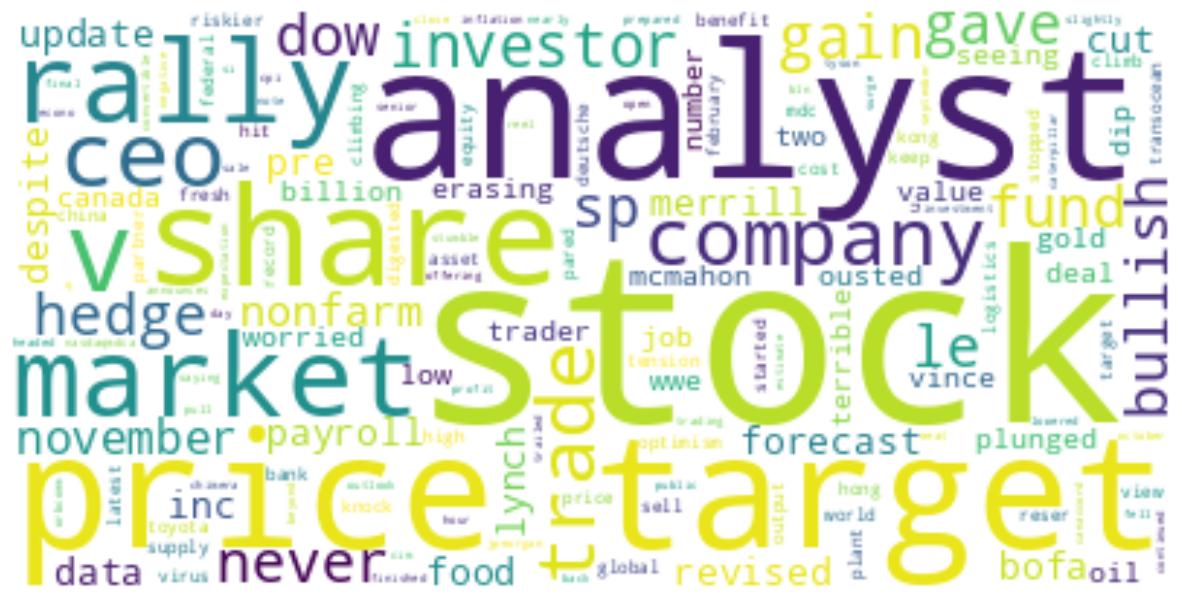

In [15]:
text = " ".join(i for i in pred_pos_true_neg_df.title_y)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

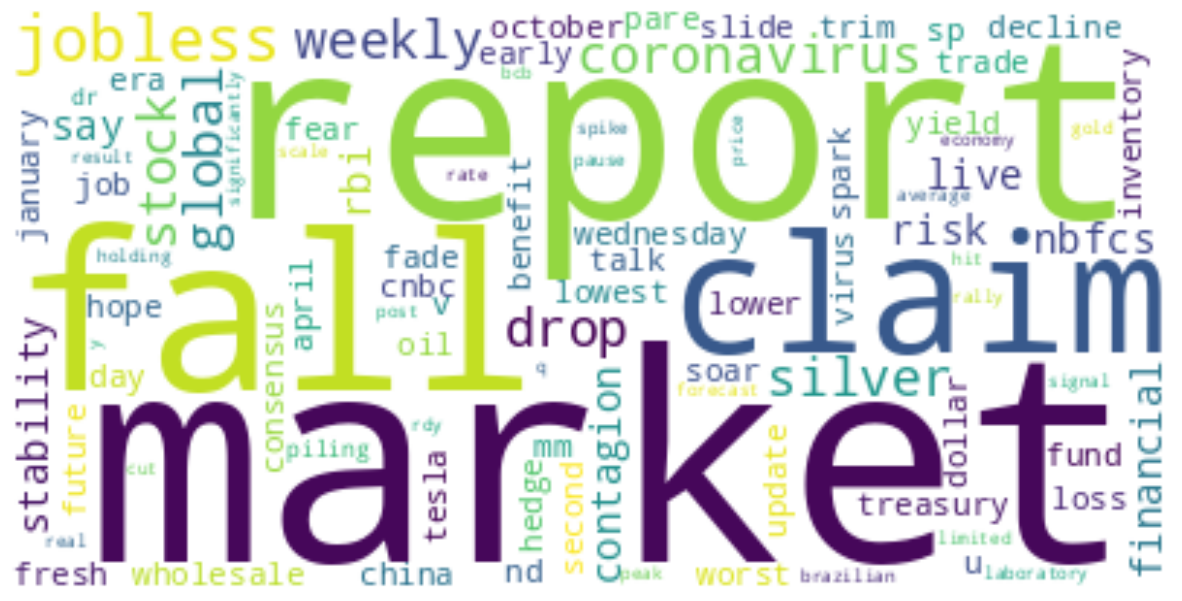

In [16]:
text = " ".join(i for i in pred_neg_true_pos_df.title_y)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Concolusion for word cloud

When analysing all the data points that were predicted negatively but their true label was positive, we discover alot of words that might possibily be associated with negative outcomes such as risk, drop, jobless, fall, coronovirus and contagion. As this examples can tend to appear more within negative examples, this might have caused the model to predict these examples as negative.